In [2]:
!pip install pandas

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [16]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [18]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [19]:
df['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2003     2
2007     2
2004     1
2018     1
Name: Year, dtype: int64

In [21]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [22]:
final_df=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [25]:
# Modifying Year
final_df['Current_Year']=2021
final_df['Car_Age']=final_df['Current_Year']-final_df['Year']

In [26]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [27]:
final_df.drop(['Year','Current_Year'],inplace=True,axis=1)

In [28]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [29]:
final_df=pd.get_dummies(final_df,drop_first=True)

In [30]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [31]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [33]:
!pip install seaborn

In [34]:
import seaborn as sns

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

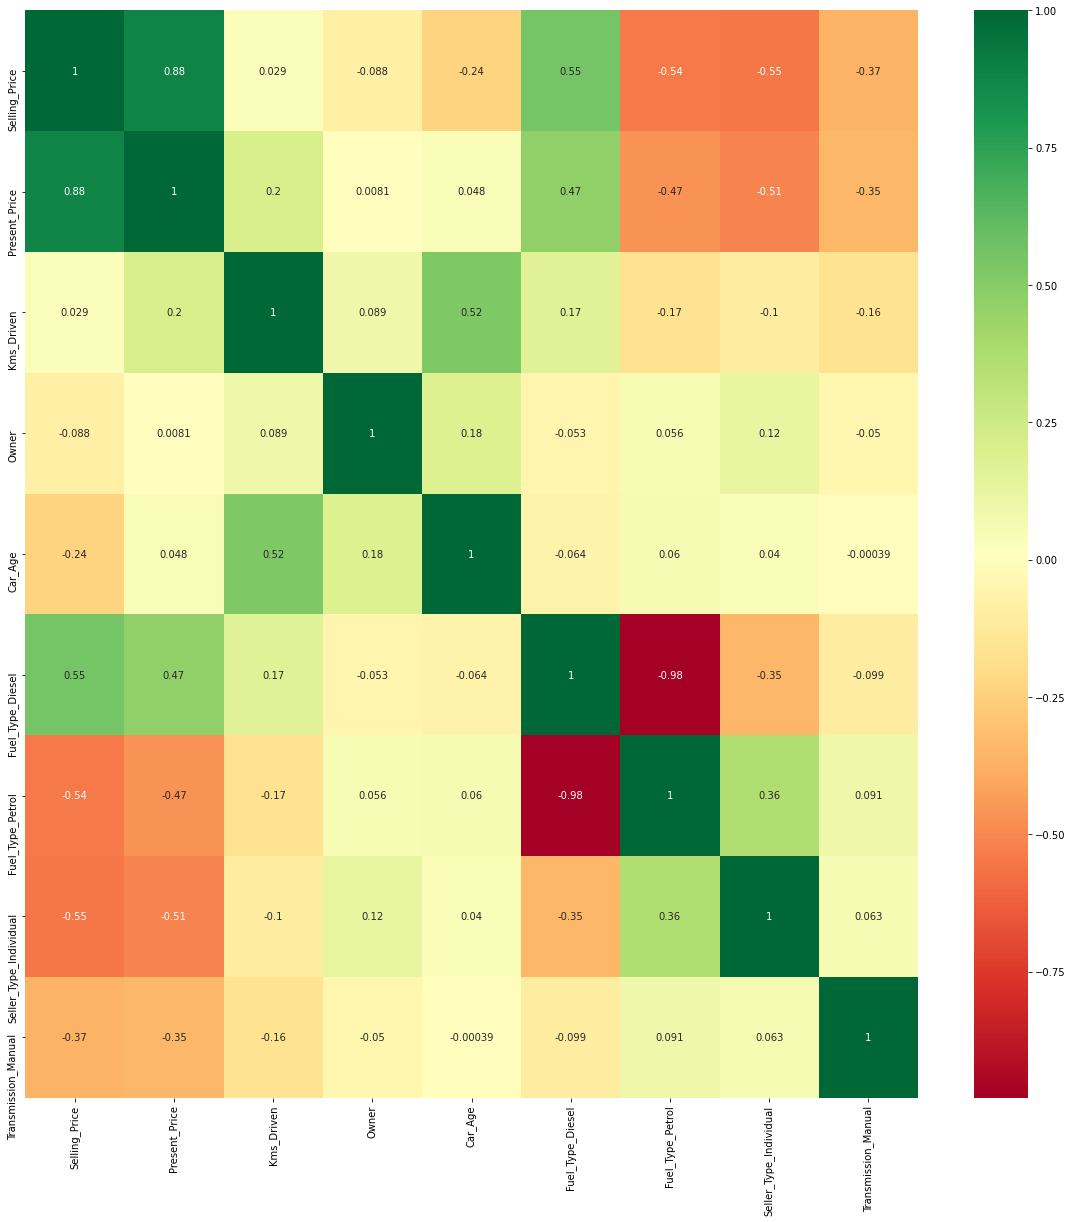

In [41]:
corrmat=final_df.corr()
top_features=corrmat.index
plt.figure(figsize=(20,20))
heat=sns.heatmap(final_df[top_features].corr(),annot=True,cmap='RdYlGn')

In [42]:
X=final_df.iloc[:,1:]
y=final_df.iloc[:,0]

In [43]:
X

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,5,1,0,0,1
297,5.90,60000,0,6,0,1,0,1
298,11.00,87934,0,12,0,1,0,1
299,12.50,9000,0,4,1,0,0,1


In [44]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [45]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=aadcf357ac3c38b9c6cbfc222723b64b9335871c8f456717dffdc8a50bae9242
  Stored in directory: c:\users\mansi\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [47]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [48]:
model.feature_importances_

array([0.32682673, 0.04216162, 0.00044269, 0.07338575, 0.27006453,
       0.00276582, 0.12446672, 0.15988614])

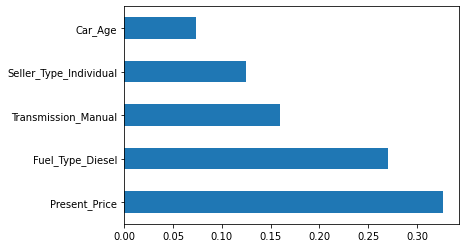

In [49]:
f_importance=pd.Series(model.feature_importances_,index=X.columns)
f_importance.nlargest(5).plot(kind='barh')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [52]:
X_train.shape

(240, 8)

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100, stop= 1200, num =12)]

In [64]:
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

min_samples_leaf= [1,2,5,10]

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
random_grid={'n_estimators': n_estimators,
            'max_features': max_features,
             'max_depth':max_depth,
            
            'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10]}


In [69]:
rf=RandomForestRegressor()

In [70]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [71]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   1.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   1.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   1.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   1.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   1.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=1100; total time=   3.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=1100; total time=   3.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=1100; total time=   4.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=1100; total time=   3.6s
[CV] END max_depth=10, max_features=aut

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [73]:
predictions=rf_random.predict(X_test)

C:\Users\Mansi\Anaconda3\envs\cardekho\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

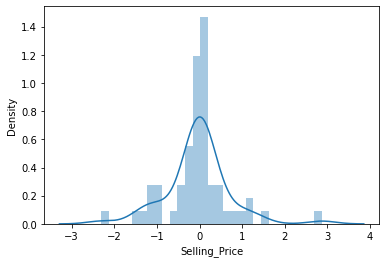

In [74]:
sns.distplot(y_test-predictions)

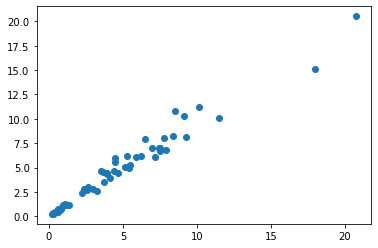

In [75]:

plt.scatter(y_test,predictions)

In [76]:
from sklearn import metrics

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.45921951292787483
MSE: 0.5484096833647073
RMSE: 0.7405468812740401


In [78]:
import pickle

file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random, file)